# ___Implementation of CNN with Keras using TensorFlow backend___

## ___Dog Cat Classifier___

_To explore and showcase how this technique can be used, I conducted a small experiment using dataset provided [on this page](https://www.kaggle.com/c/dogs-vs-cats-redux-kernels-edition/data). The train folder contains 25,000 images of dogs and cats._

_For this exercise it’s advisable to arrange the the folders that contain images as shown below. We separate images into folders and give them their appropriate names, i.e the training set and the test set. This makes it easier to import the images into Keras. Make sure that the working directory has permissions to access the images._

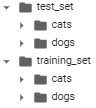

### ___Setup___
_In this step we need to import Keras and other packages that we’re going to use in building the CNN. Import the following packages:_

* ___Sequential___ _is used to initialize the neural network._
* ___Convolution2D___ _is used to make the convolutional network that deals with the images._
* ___MaxPooling2D___ _layer is used to add the pooling layers._
* ___Flatten___ _is the function that converts the pooled feature map to a single column that is passed to the fully connected layer._
* ___Dense___ _adds the fully connected layer to the neural network._
* ___Reshape___ _is used to change the shape of the input array_

In [5]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Reshape

### ___Initializing the Neural Network___
_To initialize the neural network we create an object of the Sequential class._

In [6]:
classifier = Sequential()

### ___Convolution___

_To add the convolution layer, we call the add function with the classifier object and pass in Convolution2D with parameters. The first argument nb_filter. nbfilter is the number of feature detectors that we want to create. The second and third parameters are dimensions of the feature detector matrix._

_It’s common practice to start with 32 feature detectors for CNNs. The next parameter is input_shape which is the shape of the input image. The images will be converted into this shape during preprocessing. If the image is black and white it will be converted into a 2D array and if the image is colored it will be converted into a 3D array._

_In this case, we’ll assume that we are working with colored images. Input_shape is passed in a tuple with the number of channels, which is 3 for a colored image, and the dimensions of the 2D array in each channel. If you are not using a GPU it’s advisable to use lower dimensions to reduce the computation time. When using a CPU, 64 by 64 dimensions performs well. The final parameter is the activation function. Classifying images is a nonlinear problem. So we use the rectifier function to ensure that we don’t have negative pixel values during computation. That’s how we achieve non-linearity._

In [7]:
classifier.add(Conv2D(32, (3, 3), input_shape = (256, 256, 3), activation = 'relu'))

### ___Pooling___
_In this step we reduce the size of the feature map. Generally we create a pool size of 2x2 for max pooling. This enables us to reduce the size of the feature map while not losing important image information._

In [8]:
classifier.add(MaxPooling2D(pool_size=(2,2)))

### ___Flattening___
_In this step, all the pooled feature maps are taken and put into a single vector. The Flatten function flattens all the feature maps into a single column._

In [9]:
classifier.add(Flatten())

### ___Full Connection___
_The next step is to use the vector we obtained above as the input for the neural network by using the Dense function in Keras. The first parameter is output_dim which is the number of nodes in the hidden layer. You can determine the most appropriate number through experimentation. The higher the number of dimensions the more computing resources you will need to fit the model. A common practice is to pick the number of nodes in powers of two. The second parameter is the activation function. We usually use the ReLu activation function in the hidden layer._

In [10]:
classifier.add(Dense(units = 128, activation='relu'))

_The next layer we have to add is the output layer. In this case, we’ll use the sigmoid activation function since we expect a binary outcome. If we expected more than two outcomes we would use the softmax function._

_The output_dim here is 1 since we just expect the predicted probabilities of the classes._

In [11]:
classifier.add(Dense(units=1, activation='sigmoid'))

### ___Compiling CNN___
_We then compile the CNN using the compile function. This function expects three parameters: the optimizer, the loss function, and the metrics of performance.The optimizer is the gradient descent algorithm we are going to use. We use the `binary_crossentropy` loss function since we are doing a binary classification._

In [12]:
classifier.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

### ___Fitting the CNN___
_We are going to preprocess the images using Keras to prevent overfitting. This processing is known as image augmentation. The Keras utility we use for this purpose is `ImageDataGenerator`._

In [13]:
from keras.preprocessing.image import ImageDataGenerator

_This function works by __flipping, rescaling, zooming, and shearing__ the images. The first argument rescale ensures the images are rescaled to have pixel values between zero and one. `horizontal_flip=True` means that the images will be flipped horizontally. All these actions are part of the image augmentation._

In [14]:
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   shear_range=0.2, 
                                   zoom_range=0.2, 
                                   horizontal_flip=True)

_We then use the `ImageDataGenerator` function to rescale the pixels of the test set so that they are between zero and one. Since this is the test data and not the training data we don’t have to take image augmentation steps._

In [15]:
test_datagen = ImageDataGenerator(rescale=1./255)

_The next thing we need to do is create the training set. We do this by using `train_datagen` that we just created above and the `flow_from_directory` function. The `flow_from_directory` function enables us to retrieve the images of our training set from the current working directory. The first parameter is the path to the training set._

_The second parameter is the `target_size`, which is the size of the image that the CNN should expect. We have already specified this above as 256x256, so we shall use the same for this parameter. The `batch_size` is the number of images that will go through the network before the weights are updated. The `class_mode` parameter indicates whether the classification is binary or not._

In [16]:
training_set = train_datagen.flow_from_directory('/content/training_set', 
                                                 target_size=(256, 256), 
                                                 batch_size=32, 
                                                 class_mode='binary')

Found 2050 images belonging to 3 classes.


_Now we will create the test set with similar parameters as above._

In [17]:
test_set = test_datagen.flow_from_directory('/content/test_set', 
                                            target_size=(256, 256), 
                                            batch_size=32, 
                                            class_mode='binary')

Found 200 images belonging to 3 classes.


_Finally, we need to fit the model to the training dataset and test its performance with the test set. We achieve this by calling the `fit_generator` function on the classifier object. The first argument it takes is the training set. The second argument is the number of arguments in our training set. `Epochs` is the number of epochs we want to use to train the CNN. Validation_data is the test data set. `nb_val_samples` is the number of images in the test set._

In [18]:
model = classifier.fit_generator(training_set, 
                                 steps_per_epoch=40, 
                                 epochs=25, 
                                 validation_data=test_set, 
                                 validation_steps=1000)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/25
40/40 [==============================] - 20s 495ms/step - loss: -12520.5469 - accuracy: 0.5400 - val_loss: -54668.2969 - val_accuracy: 0.5000
Epoch 2/25
40/40 [==============================] - 19s 477ms/step - loss: -174502.3281 - accuracy: 0.5792
Epoch 3/25
40/40 [==============================] - 19s 484ms/step - loss: -878882.3125 - accuracy: 0.5695
Epoch 4/25
40/40 [==============================] - 19s 465ms/step - loss: -2653763.7500 - accuracy: 0.5712
Epoch 5/25
40/40 [==============================] - 19s 467ms/step - loss: -6491837.0000 - accuracy: 0.5480
Epoch 6/25
40/40 [==============================] - 19s 466ms/step - loss: -11855702.0000 - accuracy: 0.5760
Epoch 7/25
40/40 [==============================] - 19s 464ms/step - loss: -20621722.0000 - accuracy: 0.5624
Epoch 8/25
40/40 [==============================] - 19s 463ms/step - loss: -33090712.0000 - accuracy: 0.5696
Epoch 9/25
40/

### ___Making a Single Prediction___
_Now that the model is fitted, we can use the predict method to make predictions using new images. In order to do this we need to preprocess our images before we pass them to the predict method. To achieve this we’ll use some functions from numpy. We also need to import the image module from Keras to allow us to load in the new images._

In [19]:
import numpy as np
from keras.preprocessing import image

_The next step is to load the image that we would like to predict. To accomplish this we use the `load_img` function from the image module. The first argument this function takes is the path to the location of the image and the second argument is the size of the image. The size of the image should be the same as the size used during the training process._

In [45]:
test_image = image.load_img('/content/test_set/cats/cat.4905.jpg', target_size=(256, 256))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

_Now we use the predict method to predict which class the image belongs to._

In [46]:
prediction = classifier.predict(test_image)

_After running this function we’ll get the result: either one or zero. However we don’t know which value represents which class. To find out, we use the class_indices attribute of the training set._

In [47]:
training_set.class_indices

{'.ipynb_checkpoints': 0, 'cats': 1, 'dogs': 2}

In [48]:
prediction

array([[1.]], dtype=float32)

In [49]:
if prediction[0][0] == 2:
    value = 'dog'
    print(value)
else:
    value = 'cat'
    print(value)

cat
